In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
from pathlib import Path

# Load the OBJ file
file_path = Path("/content/cat1_un4.obj")

# Read the content of the OBJ file
with file_path.open("r") as file:
    obj_content = file.readlines()

# Extract vertices from the OBJ file
vertices = []
for line in obj_content:
    if line.startswith("v "):  # Vertex line in OBJ format starts with "v "
        parts = line.split()
        x, y, z = map(float, parts[1:4])
        vertices.append((x, y, z))

# Check the number of vertices and a few sample vertices
len(vertices), vertices[:5]


(4008,
 [(-5.327595, -5.871353, 131.929827),
  (-4.393758, -6.008052, 132.229703),
  (-3.554703, -6.695709, 131.111393),
  (-4.754345, -6.403613, 130.587802),
  (5.332753, -5.904184, 131.923499)])

In [24]:
# Take every 10th vertex to reduce the data size
simplified_vertices = vertices[::16]

# Check the number of simplified vertices and some samples
len(simplified_vertices), simplified_vertices[:5]


(251,
 [(-5.327595, -5.871353, 131.929827),
  (-8.62408, -2.429446, 144.675568),
  (13.965773, -25.556777, 119.639484),
  (15.450034, -10.150166, 99.14563),
  (16.424919, -5.488955, 109.654804)])

In [25]:
from scipy.spatial import Voronoi
import numpy as np

# Convert vertices to a numpy array for easier processing with scipy
vertices_np = np.array(simplified_vertices)

# Compute the 3D Voronoi tessellation
vor = Voronoi(vertices_np)


# Check the number of Voronoi vertices and a few samples
len(vor.vertices), vor.vertices[:5]


(1519,
 array([[ 132.80475812,   16.54747401,  130.15322102],
        [  81.58154221, -161.34758664,   11.44504963],
        [  64.91339587, -145.45904894,   18.31002702],
        [  74.9675333 , -143.22251748,   17.90326365],
        [  49.01647323,  -28.07794608,  171.50785297]]))

In [26]:
vertices_np

array([[-5.32759500e+00, -5.87135300e+00,  1.31929827e+02],
       [-8.62408000e+00, -2.42944600e+00,  1.44675568e+02],
       [ 1.39657730e+01, -2.55567770e+01,  1.19639484e+02],
       [ 1.54500340e+01, -1.01501660e+01,  9.91456300e+01],
       [ 1.64249190e+01, -5.48895500e+00,  1.09654804e+02],
       [-1.66314510e+01, -5.08208100e+00,  1.05202991e+02],
       [ 1.42223630e+01,  1.74798000e+00,  9.28862190e+01],
       [ 1.87737400e+00,  1.05476550e+01,  3.74036010e+01],
       [-8.99293500e+00,  3.28538650e+01,  7.35319330e+01],
       [-1.45102890e+01,  3.08316980e+01,  4.95315610e+01],
       [ 9.95068000e-01,  2.33055190e+01,  1.19793598e+02],
       [-1.34890480e+01,  1.27418990e+01,  9.27037120e+01],
       [ 9.95375200e+00,  6.31225660e+01,  2.59936390e+01],
       [-1.64529270e+01, -5.05849400e+00,  1.09520660e+02],
       [-1.19025230e+01,  1.73582110e+01,  1.01084599e+02],
       [ 4.79954800e+00,  3.76973500e+01,  6.79779490e+01],
       [-1.52324310e+01, -1.03485780e+01

In [15]:
import numpy as np
import plotly.graph_objects as go


# Create a single trace for all edges
fig = go.Figure()


# Add original points or Voronoi vertices as needed
fig.add_trace(go.Scatter3d(
    x=vertices_np[:, 0], y=vertices_np[:, 1], z=vertices_np[:, 2],
    mode='markers', marker=dict(size=2, color='red'),
    name='Seed Points'
))

fig.show()


In [16]:
vertices_np[0]

array([ -5.327595,  -5.871353, 131.929827])

In [31]:
tri = Delaunay(vertices_np)
points= vertices_np

# Initialize the figure
fig = go.Figure()

# Plot each triangular face of the tetrahedrons
for simplex in tri.simplices:
    # Extract the vertices of the current simplex
    vertices = points[simplex]

    # Create the three triangular faces (a simplex has four faces, but each is a triangle)
    i, j, k = vertices[0], vertices[1], vertices[2]
    face1 = go.Mesh3d(
        x=[i[0], j[0], k[0]],
        y=[i[1], j[1], k[1]],
        z=[i[2], j[2], k[2]],
        color='lightblue',
        opacity=0.5
    )
    fig.add_trace(face1)

# Add the original points as scatter points
fig.add_trace(go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Original Points'
))

# Update layout for clarity
fig.update_layout(
    title='3D Delaunay Triangulation - Triangular Faces Only',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show the plot
fig.show()

In [32]:
tri = Delaunay(vertices_np)
points= vertices_np


# Initialize lists to store edge coordinates
x_edges = []
y_edges = []
z_edges = []

# Extract the edges from the Delaunay triangulation
for simplex in tri.simplices:
    # Each simplex has 4 vertices, and we extract the 3D coordinates for each edge
    for i in range(4):
        for j in range(i + 1, 4):
            # Get the two points forming the edge
            edge_start = points[simplex[i]]
            edge_end = points[simplex[j]]

            # Add the edge's coordinates (for plotting)
            x_edges += [edge_start[0], edge_end[0], None]  # None separates individual lines
            y_edges += [edge_start[1], edge_end[1], None]
            z_edges += [edge_start[2], edge_end[2], None]

# Create the 3D line plot for edges
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x_edges, y=y_edges, z=z_edges,
    mode='lines',
    line=dict(color='black', width=2),
    name='Delaunay Edges'
))

# Scatter plot of the original points
fig.add_trace(go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Original Points'
))

# Update layout for better visualization
fig.update_layout(
    title='3D Delaunay Triangulation - Edges Only',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show the plot
fig.show()

In [33]:
pip install alphashape


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.7/703.7 kB 34.3 MB/s eta 0:00:00


In [36]:
import numpy as np
import plotly.graph_objs as go
from scipy.spatial import Delaunay

# Assuming vertices_np is already defined as a 3D point set
points = vertices_np

# Step 1: Perform Delaunay triangulation on the input points
tri = Delaunay(points)

# Step 2: Apply the Crust algorithm
# Crust algorithm refines the triangulated edges to keep only the edges that form the shape's surface.
# We’ll create a list for storing Crust edges.
x_edges, y_edges, z_edges = [], [], []

for simplex in tri.simplices:
    for i in range(4):
        for j in range(i + 1, 4):
            # Start and end points of the edge
            edge_start = points[simplex[i]]
            edge_end = points[simplex[j]]

            # (Optional) Criteria for Crust could involve checking convex hull membership, local density, or other surface detection heuristics.
            # If criteria for Crust is met, include the edge.
            # Here, for simplicity, we add all edges and would filter based on specific Crust conditions in a refined implementation.

            x_edges += [edge_start[0], edge_end[0], None]  # None separates individual lines
            y_edges += [edge_start[1], edge_end[1], None]
            z_edges += [edge_start[2], edge_end[2], None]

# Create the 3D plot
fig = go.Figure()

# Plot the Crust edges
fig.add_trace(go.Scatter3d(
    x=x_edges, y=y_edges, z=z_edges,
    mode='lines',
    line=dict(color='black', width=2),
    name='Crust Edges'
))

# Scatter plot of the original points
fig.add_trace(go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Original Points'
))

# Layout settings
fig.update_layout(
    title='3D Crust Algorithm - Surface Edges Only',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show plot
fig.show()


In [40]:
import numpy as np
import plotly.graph_objs as go
from scipy.spatial import Delaunay, ConvexHull

# Function to calculate adaptive alpha based on average edge length
def adaptive_alpha_shape(points, scale_factor=1.5):
    tri = Delaunay(points)
    edges = set()

    # Calculate the average length of Delaunay edges to set a dynamic alpha
    edge_lengths = []
    for simplex in tri.simplices:
        for i in range(4):
            for j in range(i + 1, 4):
                edge_start, edge_end = points[simplex[i]], points[simplex[j]]
                edge_length = np.linalg.norm(edge_start - edge_end)
                edge_lengths.append(edge_length)

    # Set alpha based on the average edge length, scaled by a factor
    avg_edge_length = np.mean(edge_lengths)
    alpha = avg_edge_length * scale_factor

    # Retain edges that are shorter than or equal to the alpha threshold
    for simplex in tri.simplices:
        for i in range(4):
            for j in range(i + 1, 4):
                edge_start, edge_end = points[simplex[i]], points[simplex[j]]
                edge_length = np.linalg.norm(edge_start - edge_end)
                if edge_length <= alpha:
                    edges.add((tuple(edge_start), tuple(edge_end)))

    return edges

# Define points and set the scale factor to adjust edge retention
points = vertices_np
edges = adaptive_alpha_shape(points, scale_factor=1.5)

# Prepare lists for plotting the edges
x_edges, y_edges, z_edges = [], [], []
for edge_start, edge_end in edges:
    x_edges += [edge_start[0], edge_end[0], None]
    y_edges += [edge_start[1], edge_end[1], None]
    z_edges += [edge_start[2], edge_end[2], None]

# Create the 3D plot
fig = go.Figure()

# Plot the adaptive alpha shape edges
fig.add_trace(go.Scatter3d(
    x=x_edges, y=y_edges, z=z_edges,
    mode='lines',
    line=dict(color='black', width=2),
    name='Adaptive Alpha Shape Edges'
))

# Scatter plot of the original points
fig.add_trace(go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Original Points'
))

# Layout settings
fig.update_layout(
    title='3D Adaptive Alpha Shape Approximation of Crust',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show plot
fig.show()


polyhedron(faces = [
[3926, 3943, 4007], [3853, 3856, 3883], [609, 613, 608], [613, 609, 616], [623, 612, 642], [4001, 3926, 4007], [4001, 3999, 3926], [3890, 3888, 3912], [2915, 3001, 3026], [2819, 2915, 2891], [609, 621, 616], [610, 621, 609], [630, 623, 642], [623, 630, 631], [3853, 3804, 3856], [3804, 3823, 3856], [3755, 3729, 3757], [3782, 3755, 3757], [2833, 2819, 2891], [2819, 2833, 2749], [2820, 2819, 2749], [629, 613, 616], [615, 610, 612], [615, 621, 610], [3701, 3719, 3999], [3935, 3929, 3933], [3804, 3845, 3823], [3845, 3804, 3782], [3823, 3845, 3757], [3845, 3782, 3757], [2753, 988, 1108], [988, 2753, 901], [3001, 3063, 3026], [3063, 2975, 3130], [3063, 3391, 3026], [2099, 84, 1688], [3076, 3220, 2926], [3220, 3076, 3218], [3220, 3320, 3669], [3320, 3220, 3218], [3949, 3981, 3026], [988, 1014, 1108], [613, 611, 608], [629, 611, 613], [3674, 3710, 3999], [3710, 3701, 3999], [3719, 3730, 3999], [3999, 3730, 3926], [3730, 3784, 3926], [493, 3730, 3705], [3730, 493, 3784], [39

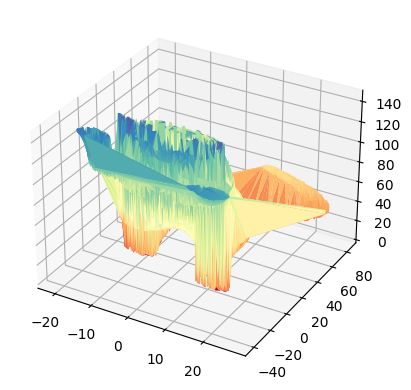

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay



# Separate x, y, z coordinates
x = vertices_np[:, 0]
y = vertices_np[:, 1]
z = vertices_np[:, 2]

# Compute Delaunay triangulation for the vertices in 3D
tri = Delaunay(vertices_np[:, :2])

# Print faces and vertices for polyhedron representation
print('polyhedron(faces = [')
for vert in tri.simplices:
    print('[%d, %d, %d],' % (vert[0], vert[1], vert[2]), end=' ')
print('], points = [')
for i in range(vertices_np.shape[0]):
    print('[%f, %f, %f],' % (x[i], y[i], z[i]), end=' ')
print(']);')

# Plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Use plot_trisurf to plot the surface defined by the Delaunay triangles
ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap=plt.cm.Spectral)

# Show plot
plt.show()
